In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = '1h7tZ9977X_vNWoByV6Y0DUxLhMjWsJKr'
print(id)

1h7tZ9977X_vNWoByV6Y0DUxLhMjWsJKr


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')
df = pd.read_csv('data.csv')
df.head()

,Province,HIV,Poverty,Drug_Users,Localizations,Illiterate,Doctors_Availability
0,Aceh,1.222793,16.98,1.91,0,0.43,15.529469
1,Sumatra Utara,11.825465,9.85,3.20,1,0.66,10.307331
2,Sumatra Barat,6.254993,6.89,1.72,0,0.43,8.262047
3,Riau,8.887596,7.99,1.97,9,0.48,7.788766
4,Jambi,5.083124,8.39,1.71,2,0.57,9.030020


# EDA

In [5]:
df.describe()

,HIV,Poverty,Drug_Users,Localizations,Illiterate,Doctors_Availability
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,16.969835,11.387059,2.023235,5.000000,1.873824,9.283912
std,23.305071,6.177635,0.704233,10.574412,4.814444,4.018148
min,1.222793,1.360000,1.210000,0.000000,0.080000,3.058548
25%,4.954385,6.522500,1.642500,0.000000,0.422500,6.605844
50%,8.266785,9.695000,1.865000,1.000000,0.610000,9.014347
75%,15.767515,14.465000,2.180000,5.000000,1.417500,10.382557
max,106.049822,27.800000,5.010000,53.000000,28.500000,20.381753


Text(0.5, 1.0, 'Distribution of HIV Prevalence')

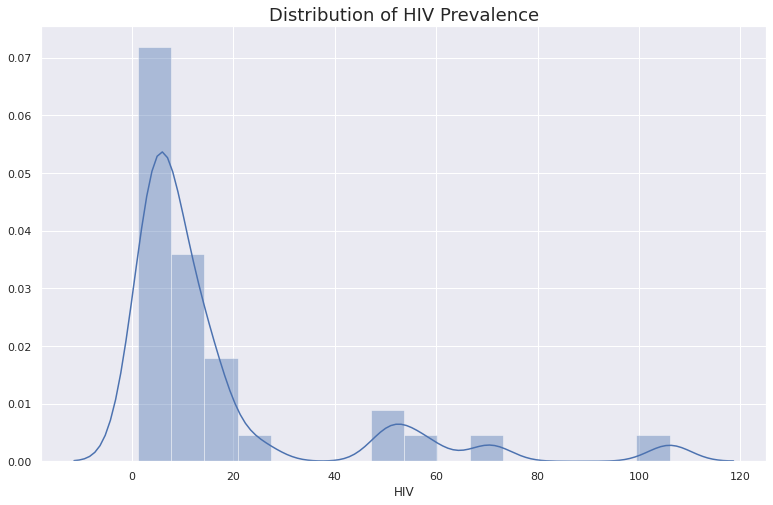

In [6]:
fig, axes = plt.subplots(1,1, figsize=(13,8))
sns.distplot(df['HIV'])
plt.title('Distribution of HIV Prevalence', size=18)

In [7]:
treshold = df['HIV'].median()
color = {}
for i in range(df['Province'].count()):
  if df.loc[i,'HIV'] > treshold:
    df.loc[i,'Level'] = 'High'
    color[i] = 'r'
  else:
    df.loc[i,'Level'] = 'Low'
    color[i] = 'g'

Text(0.5, 1.0, 'Number of Low and High HIV Prevalence')

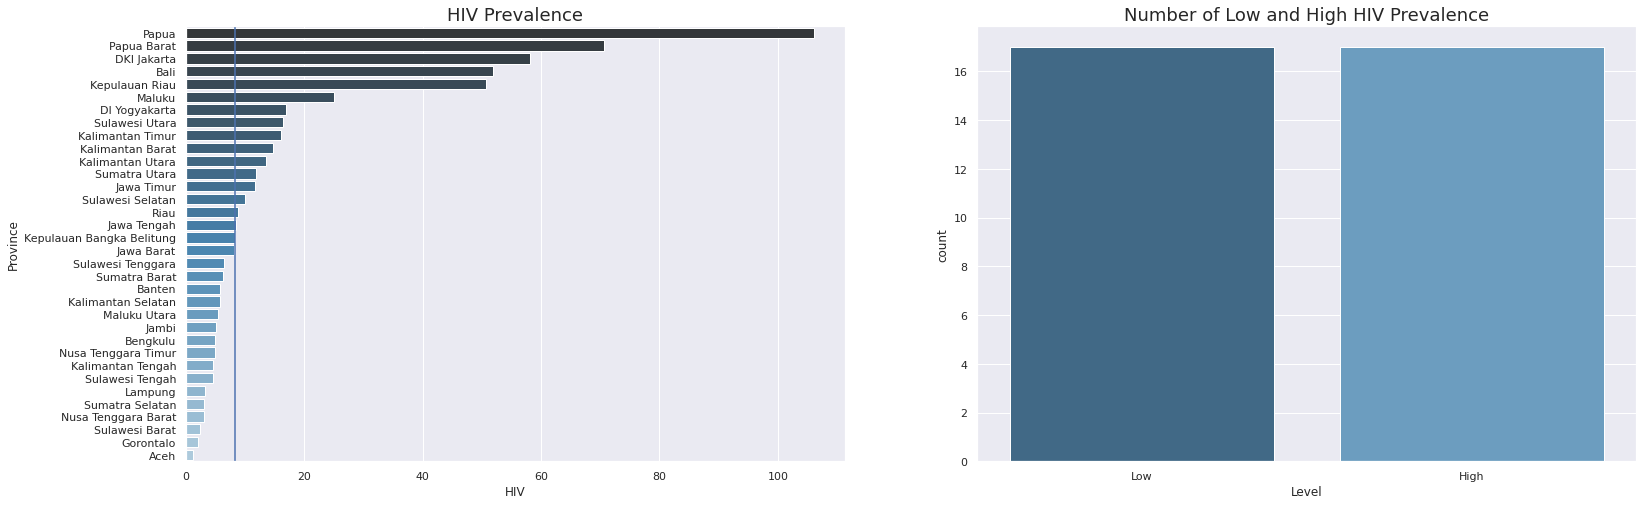

In [8]:
sns.set_palette = 'Set2'

fig, axes = plt.subplots(1,2, figsize=(13*2,8),sharex=False, sharey=False)

sns.barplot(y='Province', x='HIV', data=df.sort_values(by=['HIV'], ascending=False),
             ax=axes[0], orient='h',  palette="Blues_d")
axes[0].axvline(treshold)
axes[0].set_title('HIV Prevalence', size=18)

sns.countplot(x=df['Level'], palette='Blues_d', ax= axes[1])
axes[1].set_title('Number of Low and High HIV Prevalence', size=18)

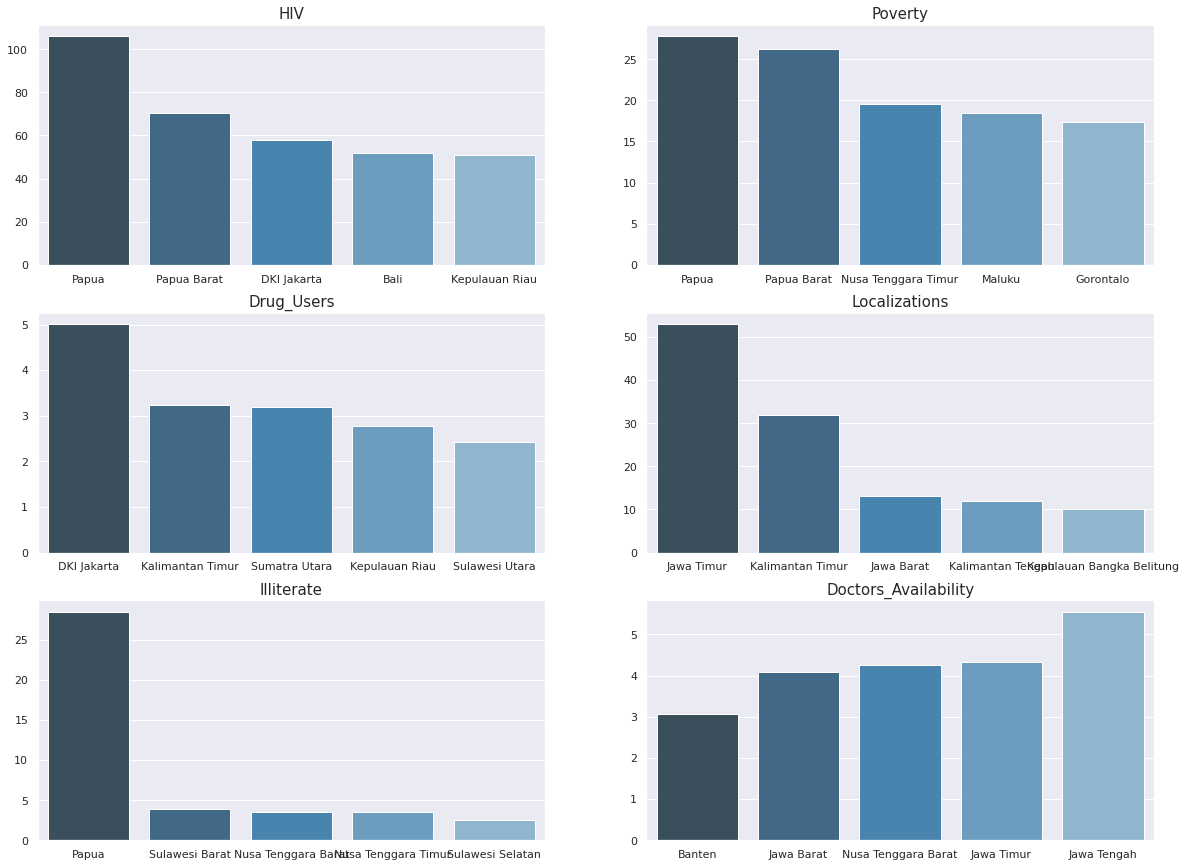

In [9]:
fig, axes = plt.subplots(3,2, figsize=(20,5*3),sharex=False, sharey=False)

i=1
for j in range(3):
  for k in range(2):
    sns.barplot(x='Province', y=df.columns[i], data=df.sort_values(by=df.columns[i], ascending=True if i==6 else False).head(5),
             orient='v', ax=axes[j,k], palette="Blues_d")
    axes[j][k].set_title(df.columns[i], size=15)
    axes[j][k].set_xlabel("")
    axes[j][k].set_ylabel("")
    i=i+1

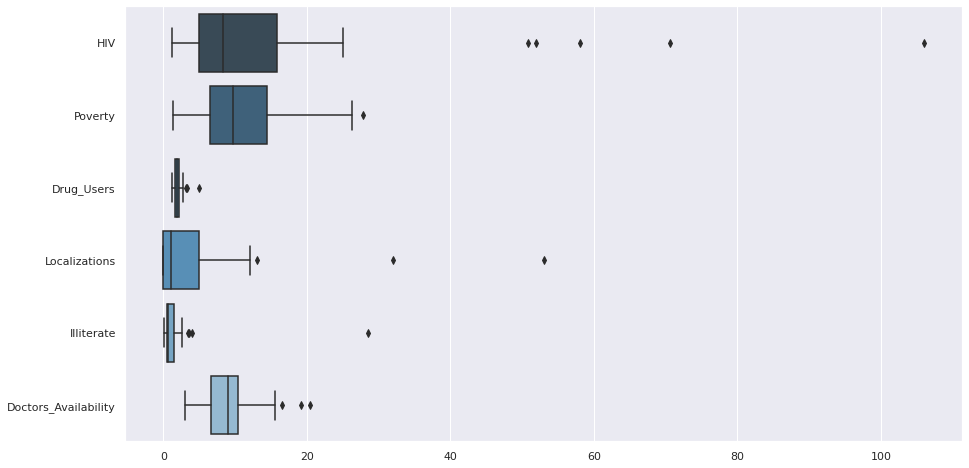

In [10]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, orient="h", palette='Blues_d')

<Figure size 1080x576 with 0 Axes>

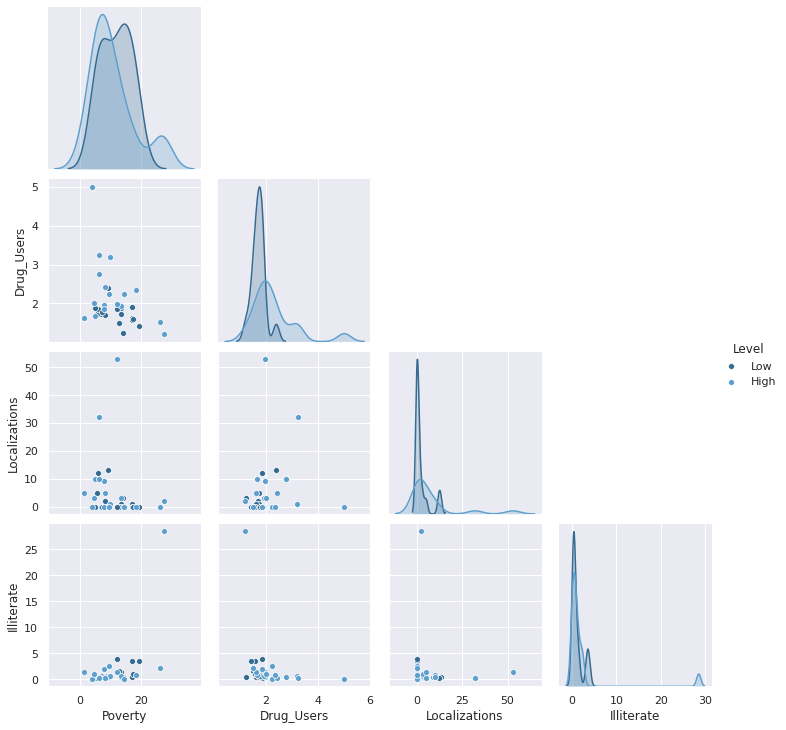

In [11]:
plt.figure(figsize=(15,8))
ax = sns.pairplot(df, 
             x_vars = df.columns[2:6].values,
             y_vars = df.columns[2:6].values,
             hue='Level', palette='Blues_d', corner=True)

# **Decision Tree**

In [12]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import graphviz

In [13]:
predictor = df.iloc[:,2:6]
target = df.iloc[:,7:]

Accuracy is  94.11764705882352


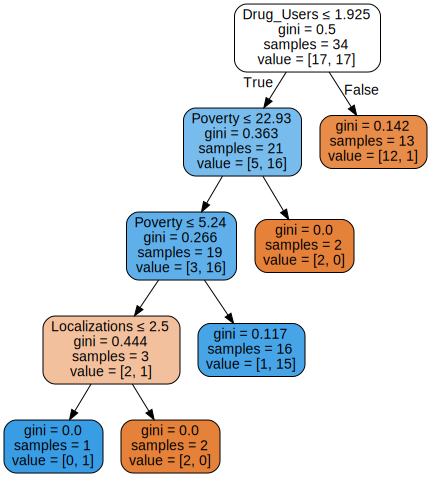

In [14]:
clf_gini = DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  min_impurity_split=0.2, max_depth = 5)
clf_gini.fit(predictor,target)
dot_data_gini = tree.export_graphviz(clf_gini,out_file=None, feature_names= predictor.columns,
                                     filled=True, rounded=True, special_characters=True)
graph_gini = graphviz.Source(dot_data_gini)

target_pred = clf_gini.predict(predictor)
acc = accuracy_score(target,target_pred)*100

print("Accuracy is ", acc)
graph_gini

Accuracy is  97.05882352941177


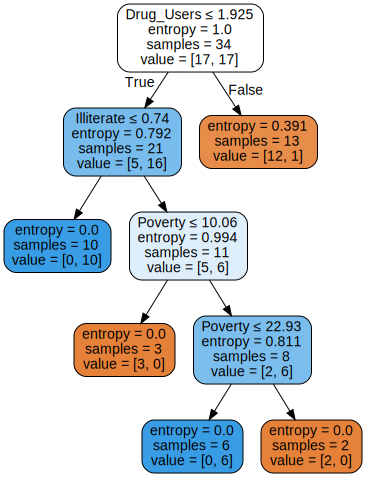

In [15]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',   
                                  min_impurity_split=0.5, max_depth = 5)
clf_entropy.fit(predictor,target)
dot_data_entropy = tree.export_graphviz(clf_entropy,out_file=None, feature_names= predictor.columns,
                                     filled=True, rounded=True, special_characters=True)
graph_entropy = graphviz.Source(dot_data_entropy)

target_pred = clf_entropy.predict(predictor)
acc = accuracy_score(target,target_pred)*100

print("Accuracy is ", acc)
graph_entropy